In [2]:
import sys
import os
script_dir = os.path.dirname(os.path.realpath('__file__'))
parent_dir = os.path.dirname(script_dir)
sys.path.insert(0, parent_dir)

import cnn_functions
import models
import pickle
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms
from torch.utils.data import Subset, DataLoader
from torch.utils.tensorboard import SummaryWriter

# Binary output

In [3]:
# Use the GPU instead of the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define the label map
labels_map = {
    0: "REAL",
    1: "FAKE"
}

# Compose the transform that will be applied to the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = cnn_functions.BinaryCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/train'), transform=transform)

# 10k samples for validation and 10k samples for testing
val_test_ds= cnn_functions.BinaryCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/test'), transform=transform)
idx_val, idx_test = train_test_split(
    range(len(val_test_ds)),
    test_size=0.5,  # 50-50 split
    stratify=val_test_ds.img_labels, # Uniform class distribution
    random_state=0
)
validation_ds = Subset(val_test_ds, idx_val)
test_ds = Subset(val_test_ds, idx_test)

cuda


FileNotFoundError: [Errno 2] No such file or directory: '/home/scardovi/ai-generated-image-detection/cnn/cifake/resnet18/binary/../../dataset/train/REAL'

# Feature extraction

/home/scardovi/ai-generated-image-detection/detection/lib/python3.10/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))




 - binary_feature_extraction_linear_lr1e-03_batch32
Epoch 1; Train err = 24.06%; Val err = 24.35%; Loss: 0.5415
Epoch 2; Train err = 24.20%; Val err = 24.09%; Loss: 0.5337
Epoch 3; Train err = 23.68%; Val err = 22.97%; Loss: 0.5332
Epoch 4; Train err = 23.60%; Val err = 23.54%; Loss: 0.5328
Epoch 5; Train err = 24.19%; Val err = 24.16%; Loss: 0.5345
Epoch 10; Train err = 24.35%; Val err = 23.64%; Loss: 0.5360
Epoch 15; Train err = 23.94%; Val err = 24.28%; Loss: 0.5341
Epoch 20; Train err = 24.45%; Val err = 24.91%; Loss: 0.5297
Epoch 25; Train err = 23.56%; Val err = 23.32%; Loss: 0.5300
Epoch 27; Train err = 25.02%; Val err = 25.37%; Loss: 0.5350
Stopping training...


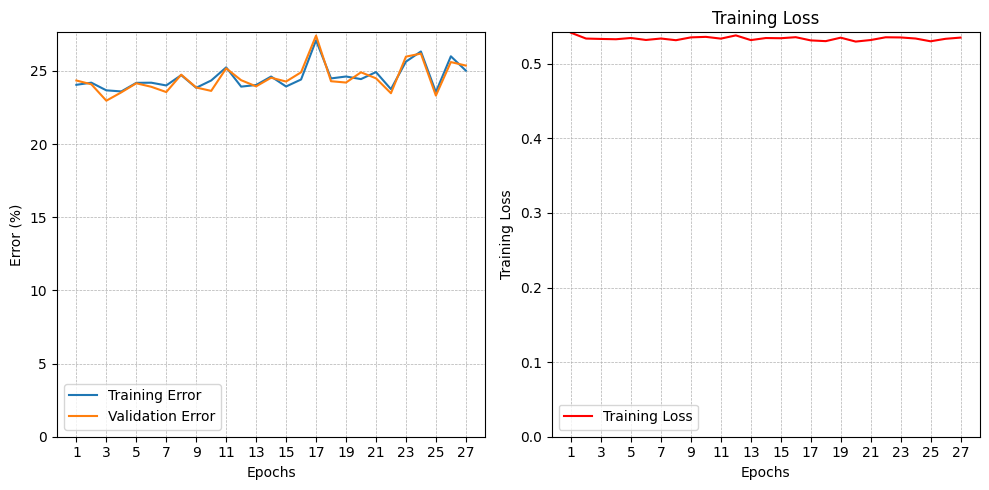



 - binary_feature_extraction_linear_lr1e-03_batch512
Epoch 1; Train err = 24.39%; Val err = 24.40%; Loss: 0.5683
Epoch 2; Train err = 23.51%; Val err = 23.56%; Loss: 0.5024
Epoch 3; Train err = 23.17%; Val err = 23.14%; Loss: 0.4931
Epoch 4; Train err = 22.84%; Val err = 22.64%; Loss: 0.4892
Epoch 5; Train err = 22.78%; Val err = 22.46%; Loss: 0.4873
Epoch 10; Train err = 22.59%; Val err = 22.67%; Loss: 0.4842
Epoch 15; Train err = 22.54%; Val err = 22.31%; Loss: 0.4835
Epoch 20; Train err = 22.53%; Val err = 22.46%; Loss: 0.4831
Epoch 22; Train err = 22.49%; Val err = 22.35%; Loss: 0.4826
Stopping training...


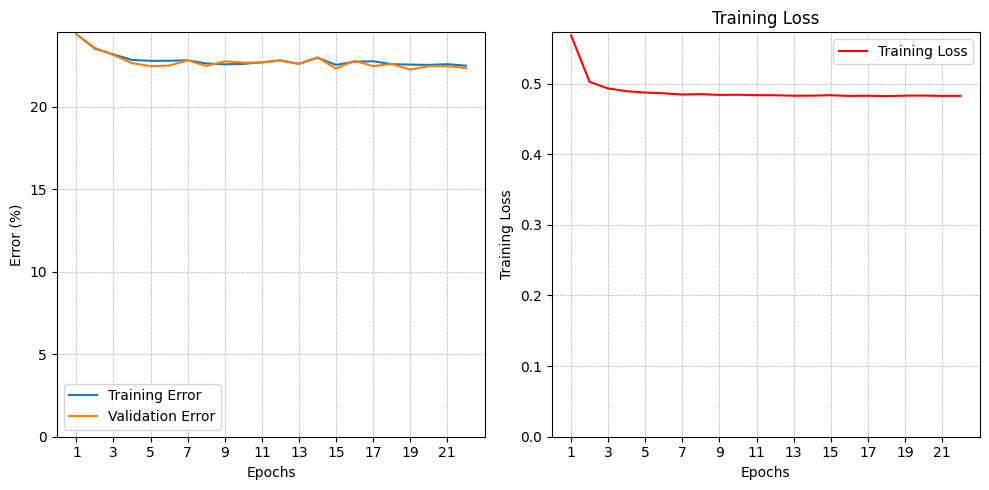



 - binary_feature_extraction_linear_lr1e-03_batch1024
Epoch 1; Train err = 25.88%; Val err = 26.01%; Loss: 0.6135
Epoch 2; Train err = 24.45%; Val err = 24.49%; Loss: 0.5181
Epoch 3; Train err = 23.87%; Val err = 23.86%; Loss: 0.5044
Epoch 4; Train err = 23.42%; Val err = 23.52%; Loss: 0.4976
Epoch 5; Train err = 23.22%; Val err = 23.17%; Loss: 0.4940
Epoch 10; Train err = 22.72%; Val err = 22.93%; Loss: 0.4858
Epoch 15; Train err = 22.70%; Val err = 22.77%; Loss: 0.4828
Epoch 20; Train err = 22.78%; Val err = 22.94%; Loss: 0.4823
Epoch 22; Train err = 22.56%; Val err = 22.44%; Loss: 0.4815
Stopping training...


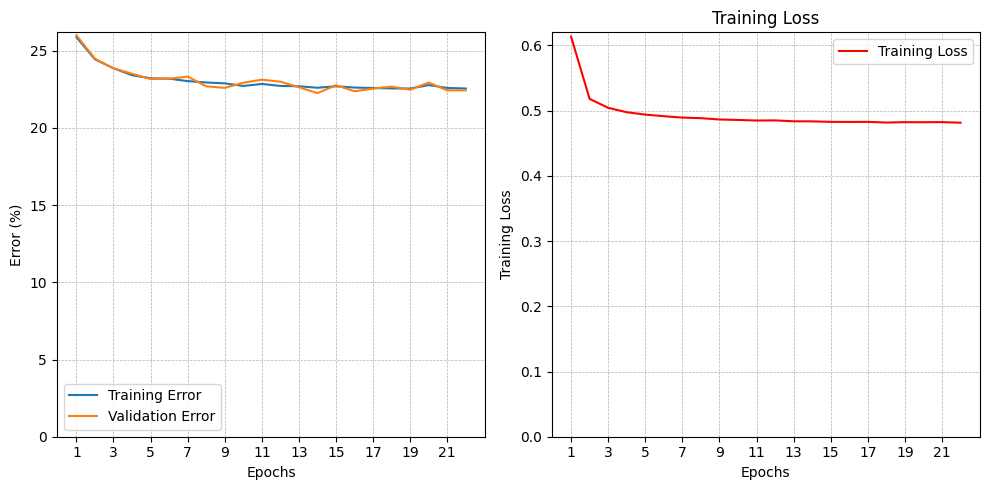



 - binary_feature_extraction_linear_lr1e-04_batch32
Epoch 1; Train err = 23.98%; Val err = 24.06%; Loss: 0.5518
Epoch 2; Train err = 23.75%; Val err = 23.31%; Loss: 0.5056
Epoch 3; Train err = 23.20%; Val err = 22.87%; Loss: 0.5007
Epoch 4; Train err = 23.21%; Val err = 22.95%; Loss: 0.5003
Epoch 5; Train err = 23.15%; Val err = 22.98%; Loss: 0.4982
Epoch 10; Train err = 23.03%; Val err = 22.86%; Loss: 0.4988
Epoch 15; Train err = 23.12%; Val err = 22.65%; Loss: 0.5000
Epoch 20; Train err = 23.10%; Val err = 22.94%; Loss: 0.4977
Epoch 25; Train err = 22.86%; Val err = 22.46%; Loss: 0.4989
Epoch 26; Train err = 23.17%; Val err = 23.03%; Loss: 0.4970
Stopping training...


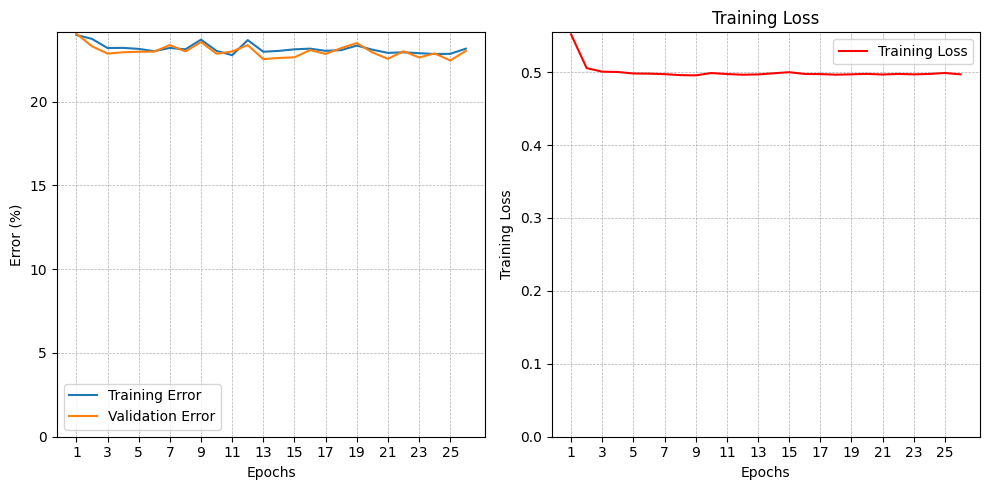



 - binary_feature_extraction_linear_lr1e-04_batch512
Epoch 1; Train err = 34.88%; Val err = 34.54%; Loss: 0.7177
Epoch 2; Train err = 29.61%; Val err = 28.74%; Loss: 0.6042
Epoch 3; Train err = 27.45%; Val err = 26.99%; Loss: 0.5664
Epoch 4; Train err = 26.38%; Val err = 25.78%; Loss: 0.5475
Epoch 5; Train err = 25.80%; Val err = 25.15%; Loss: 0.5361
Epoch 10; Train err = 24.41%; Val err = 23.95%; Loss: 0.5113
Epoch 15; Train err = 23.80%; Val err = 23.42%; Loss: 0.5013
Epoch 20; Train err = 23.37%; Val err = 23.08%; Loss: 0.4959
Epoch 22; Train err = 23.30%; Val err = 23.33%; Loss: 0.4935
Stopping training...


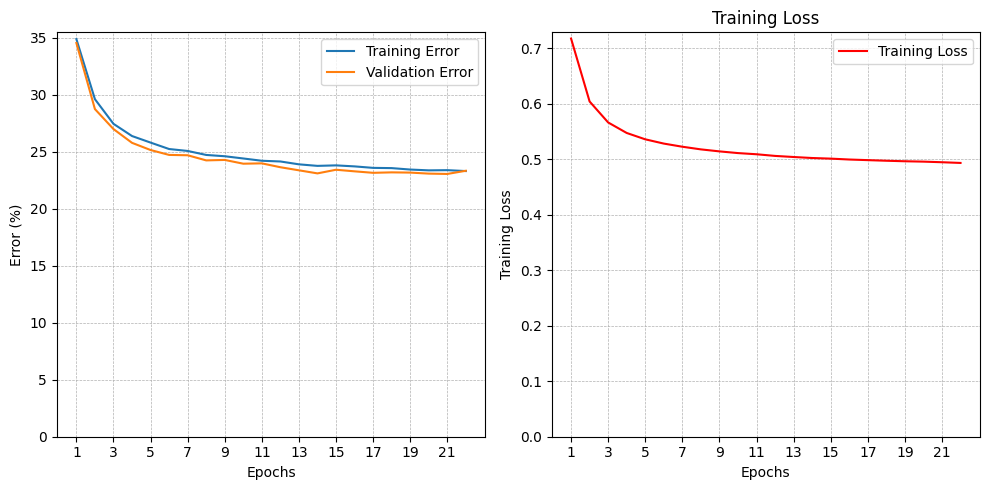



 - binary_feature_extraction_linear_lr1e-04_batch1024
Epoch 1; Train err = 40.81%; Val err = 40.56%; Loss: 0.7825
Epoch 2; Train err = 35.38%; Val err = 35.04%; Loss: 0.6688
Epoch 3; Train err = 32.04%; Val err = 31.99%; Loss: 0.6216
Epoch 4; Train err = 29.86%; Val err = 29.79%; Loss: 0.5939
Epoch 5; Train err = 28.64%; Val err = 28.47%; Loss: 0.5751
Epoch 10; Train err = 25.83%; Val err = 26.23%; Loss: 0.5344
Epoch 15; Train err = 24.95%; Val err = 25.01%; Loss: 0.5191
Epoch 20; Train err = 24.39%; Val err = 24.43%; Loss: 0.5098
Epoch 23; Train err = 24.11%; Val err = 24.24%; Loss: 0.5062
Stopping training...


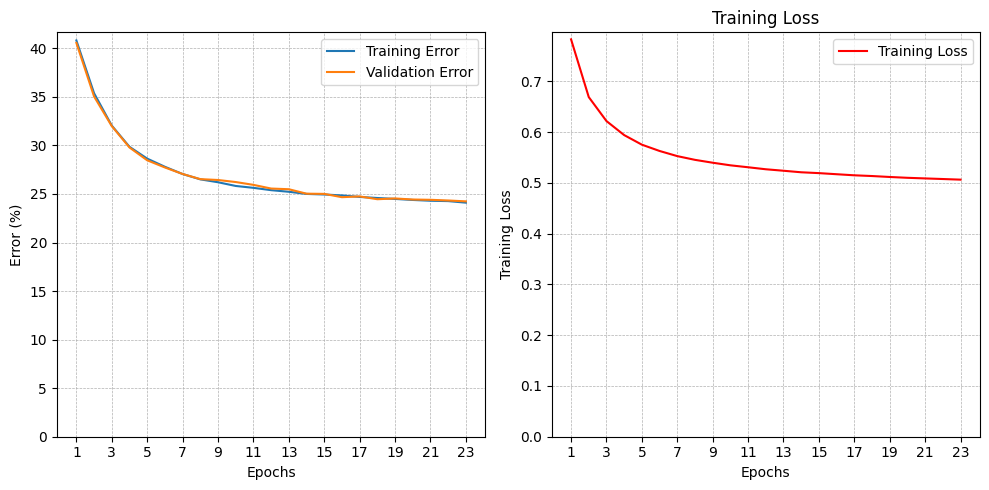



 - binary_feature_extraction_linear_lr1e-05_batch32
Epoch 1; Train err = 31.70%; Val err = 31.39%; Loss: 0.6663
Epoch 2; Train err = 27.69%; Val err = 26.97%; Loss: 0.5766
Epoch 3; Train err = 26.21%; Val err = 25.64%; Loss: 0.5482
Epoch 4; Train err = 25.55%; Val err = 24.94%; Loss: 0.5341
Epoch 5; Train err = 25.08%; Val err = 25.02%; Loss: 0.5255
Epoch 10; Train err = 24.12%; Val err = 23.87%; Loss: 0.5085
Epoch 15; Train err = 23.55%; Val err = 23.32%; Loss: 0.5019
Epoch 20; Train err = 23.33%; Val err = 23.22%; Loss: 0.5012
Epoch 23; Train err = 23.10%; Val err = 23.07%; Loss: 0.4987
Stopping training...


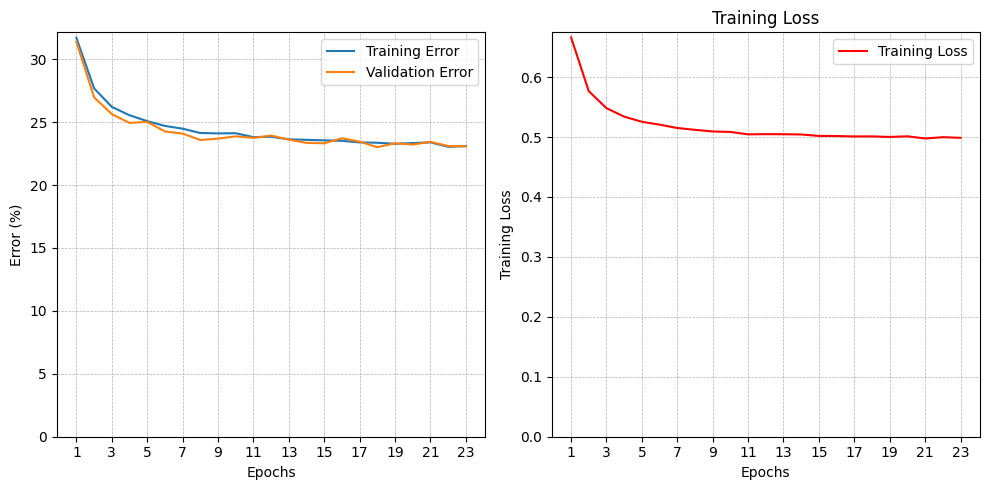



 - binary_feature_extraction_linear_lr1e-05_batch512
Epoch 1; Train err = 55.41%; Val err = 55.55%; Loss: 0.8498
Epoch 2; Train err = 52.85%; Val err = 53.16%; Loss: 0.8140
Epoch 3; Train err = 50.26%; Val err = 50.62%; Loss: 0.7840
Epoch 4; Train err = 47.81%; Val err = 48.35%; Loss: 0.7592
Epoch 5; Train err = 45.48%; Val err = 46.14%; Loss: 0.7355
Epoch 10; Train err = 37.29%; Val err = 37.93%; Loss: 0.6614
Epoch 15; Train err = 32.80%; Val err = 33.13%; Loss: 0.6208
Epoch 20; Train err = 30.51%; Val err = 30.79%; Loss: 0.5941
Epoch 25; Train err = 29.01%; Val err = 29.27%; Loss: 0.5762
Epoch 30; Train err = 27.99%; Val err = 28.08%; Loss: 0.5636
Epoch 35; Train err = 27.38%; Val err = 27.50%; Loss: 0.5538
Epoch 40; Train err = 26.84%; Val err = 27.04%; Loss: 0.5469
Epoch 45; Train err = 26.36%; Val err = 25.91%; Loss: 0.5402
Epoch 50; Train err = 26.05%; Val err = 26.01%; Loss: 0.5349
Epoch 50; Train err = 26.05%; Val err = 26.01%; Loss: 0.5349
Stopping training...


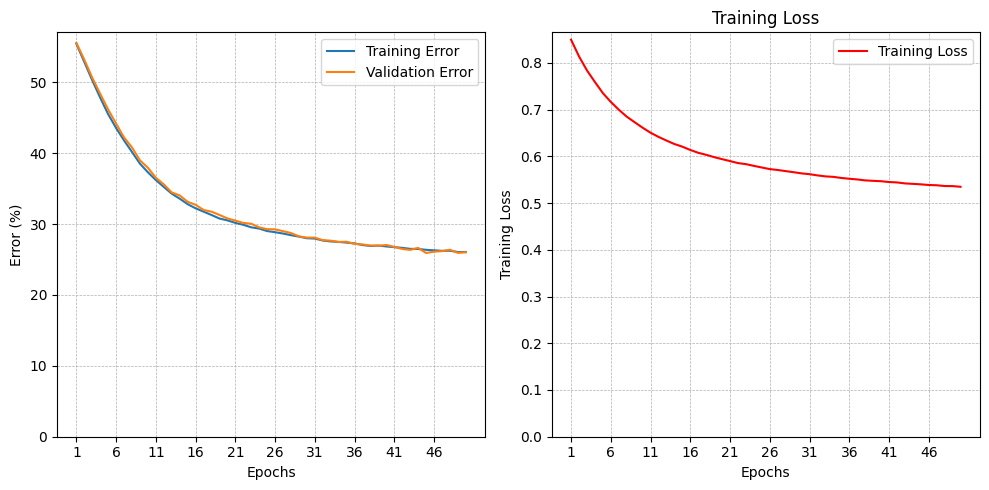



 - binary_feature_extraction_linear_lr1e-05_batch1024
Epoch 1; Train err = 45.38%; Val err = 44.93%; Loss: 0.7592
Epoch 2; Train err = 44.61%; Val err = 44.28%; Loss: 0.7339
Epoch 3; Train err = 43.73%; Val err = 43.23%; Loss: 0.7223
Epoch 4; Train err = 42.84%; Val err = 42.45%; Loss: 0.7119
Epoch 5; Train err = 41.94%; Val err = 41.40%; Loss: 0.7031
Epoch 10; Train err = 38.18%; Val err = 37.80%; Loss: 0.6659
Epoch 15; Train err = 35.27%; Val err = 35.01%; Loss: 0.6397
Epoch 20; Train err = 33.17%; Val err = 33.00%; Loss: 0.6201
Epoch 25; Train err = 31.52%; Val err = 31.51%; Loss: 0.6052
Epoch 30; Train err = 30.33%; Val err = 30.38%; Loss: 0.5934
Epoch 35; Train err = 29.52%; Val err = 29.68%; Loss: 0.5839
Epoch 40; Train err = 28.83%; Val err = 28.90%; Loss: 0.5759
Epoch 45; Train err = 28.30%; Val err = 28.57%; Loss: 0.5697
Epoch 50; Train err = 27.89%; Val err = 28.23%; Loss: 0.5635


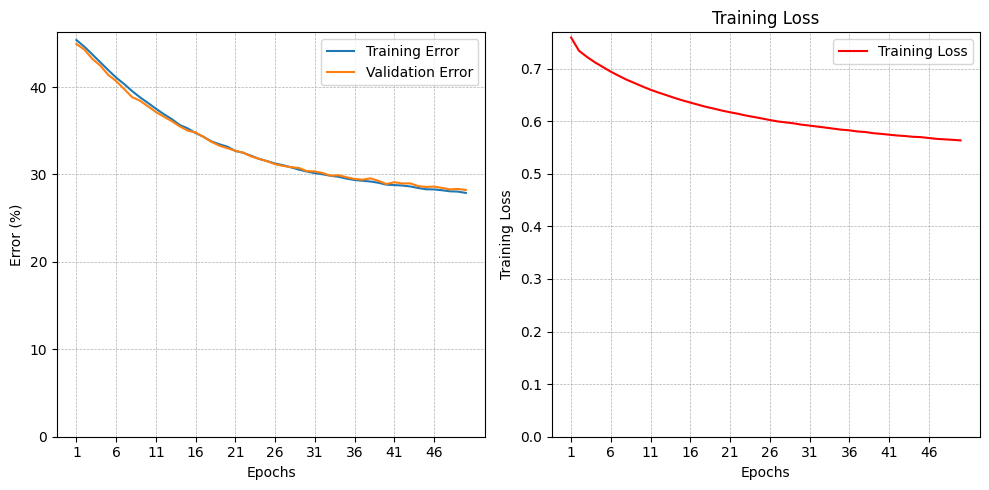

In [3]:
model_init_function = models.binary_feature_extraction_linear
epochs = 50
learning_rates = [0.001, 0.0001, 0.00001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

# Feature extraction with one hidden layer



 - binary_feature_extraction_1hidden_lr1e-03_batch32


Epoch 1; Train err = 22.92%; Val err = 22.67%; Loss: 0.5421
Epoch 2; Train err = 21.73%; Val err = 21.49%; Loss: 0.5072
Epoch 3; Train err = 21.50%; Val err = 21.78%; Loss: 0.4937
Epoch 4; Train err = 20.55%; Val err = 20.60%; Loss: 0.4873
Epoch 5; Train err = 20.12%; Val err = 20.54%; Loss: 0.4813
Epoch 10; Train err = 18.86%; Val err = 19.51%; Loss: 0.4684
Epoch 15; Train err = 18.79%; Val err = 19.74%; Loss: 0.4602
Epoch 20; Train err = 17.98%; Val err = 18.69%; Loss: 0.4578
Epoch 25; Train err = 18.59%; Val err = 19.77%; Loss: 0.4552
Epoch 25; Train err = 18.59%; Val err = 19.77%; Loss: 0.4552
Stopping training...


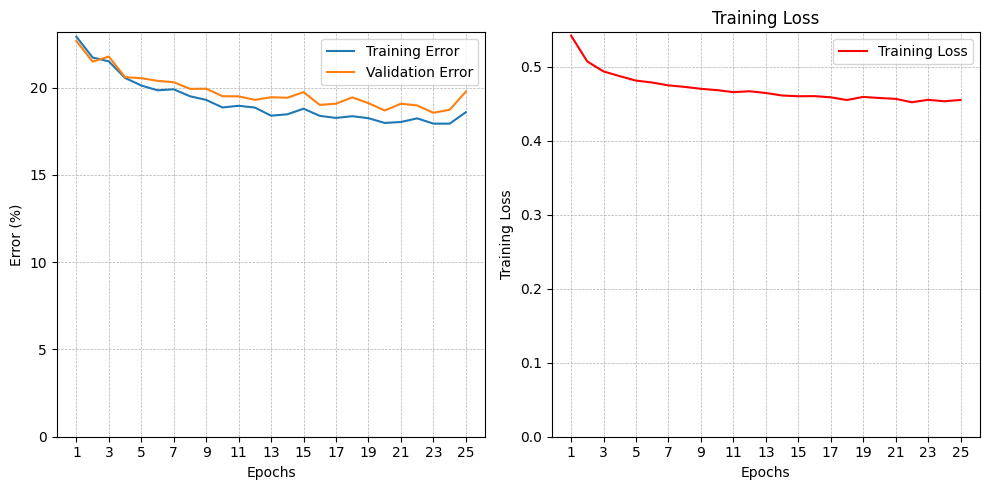



 - binary_feature_extraction_1hidden_lr1e-03_batch512
Epoch 1; Train err = 28.20%; Val err = 28.39%; Loss: 0.6551
Epoch 2; Train err = 25.72%; Val err = 25.89%; Loss: 0.5868
Epoch 3; Train err = 24.63%; Val err = 24.97%; Loss: 0.5553
Epoch 4; Train err = 24.20%; Val err = 24.10%; Loss: 0.5396
Epoch 5; Train err = 23.78%; Val err = 23.84%; Loss: 0.5279
Epoch 10; Train err = 22.49%; Val err = 22.60%; Loss: 0.5001
Epoch 15; Train err = 21.77%; Val err = 22.00%; Loss: 0.4868
Epoch 20; Train err = 21.05%; Val err = 21.58%; Loss: 0.4769
Epoch 25; Train err = 20.58%; Val err = 21.08%; Loss: 0.4695
Epoch 28; Train err = 20.36%; Val err = 21.03%; Loss: 0.4648
Stopping training...


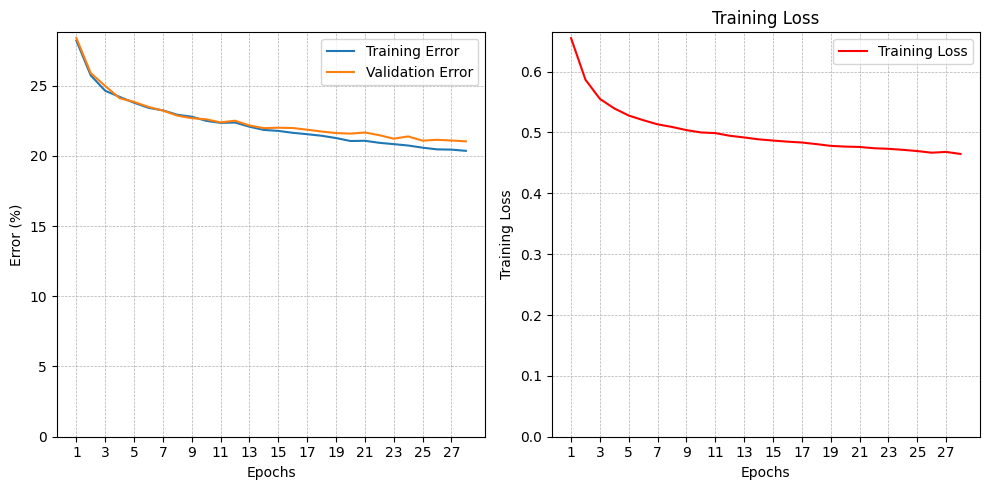



 - binary_feature_extraction_1hidden_lr1e-03_batch1024
Epoch 1; Train err = 31.92%; Val err = 31.93%; Loss: 0.7017
Epoch 2; Train err = 28.02%; Val err = 27.89%; Loss: 0.6350
Epoch 3; Train err = 26.64%; Val err = 26.78%; Loss: 0.6003
Epoch 4; Train err = 25.85%; Val err = 25.74%; Loss: 0.5782
Epoch 5; Train err = 25.25%; Val err = 25.29%; Loss: 0.5620
Epoch 10; Train err = 23.70%; Val err = 23.90%; Loss: 0.5262
Epoch 15; Train err = 22.93%; Val err = 23.15%; Loss: 0.5078
Epoch 20; Train err = 22.43%; Val err = 22.64%; Loss: 0.4989
Epoch 25; Train err = 22.04%; Val err = 22.42%; Loss: 0.4905
Epoch 26; Train err = 21.98%; Val err = 22.41%; Loss: 0.4900
Stopping training...


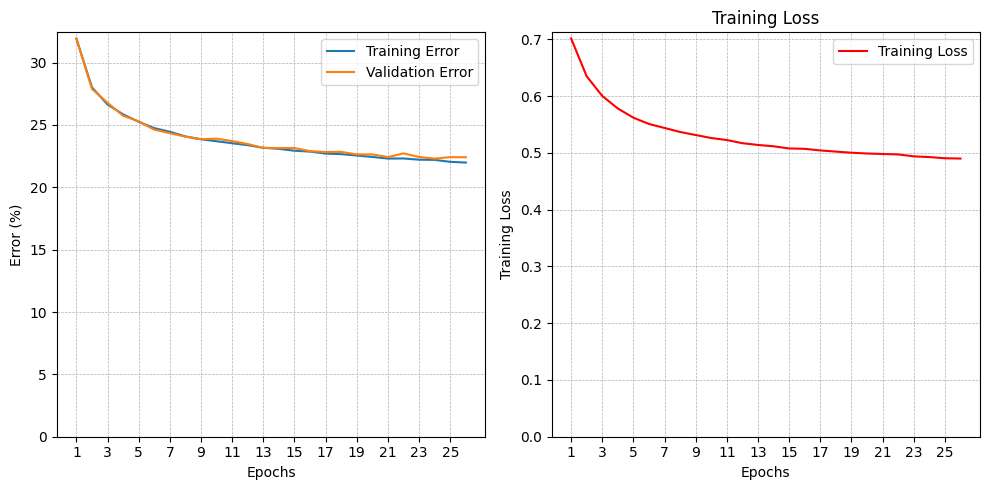



 - binary_feature_extraction_1hidden_lr1e-04_batch32
Epoch 1; Train err = 25.92%; Val err = 26.33%; Loss: 0.6255
Epoch 2; Train err = 24.90%; Val err = 25.05%; Loss: 0.5612
Epoch 3; Train err = 24.13%; Val err = 24.47%; Loss: 0.5428
Epoch 4; Train err = 23.80%; Val err = 23.98%; Loss: 0.5315
Epoch 5; Train err = 23.32%; Val err = 23.13%; Loss: 0.5252
Epoch 10; Train err = 22.68%; Val err = 22.90%; Loss: 0.5091
Epoch 15; Train err = 22.04%; Val err = 22.28%; Loss: 0.4980
Epoch 20; Train err = 21.62%; Val err = 21.66%; Loss: 0.4935
Epoch 23; Train err = 21.32%; Val err = 21.18%; Loss: 0.4896
Stopping training...


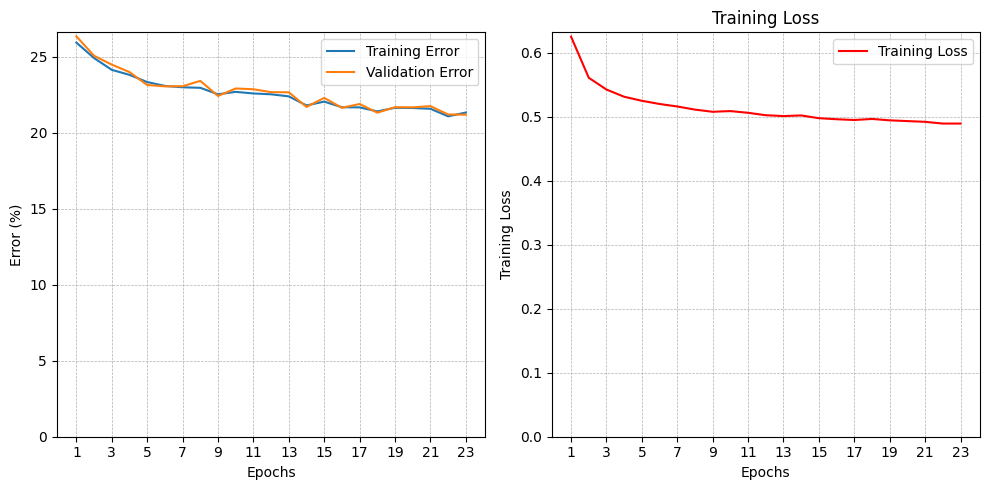



 - binary_feature_extraction_1hidden_lr1e-04_batch512
Epoch 1; Train err = 44.52%; Val err = 44.83%; Loss: 0.7099
Epoch 2; Train err = 39.36%; Val err = 39.53%; Loss: 0.6887
Epoch 3; Train err = 36.09%; Val err = 36.07%; Loss: 0.6749
Epoch 4; Train err = 33.88%; Val err = 34.12%; Loss: 0.6646
Epoch 5; Train err = 32.52%; Val err = 32.57%; Loss: 0.6552
Epoch 10; Train err = 28.40%; Val err = 28.90%; Loss: 0.6155
Epoch 15; Train err = 26.79%; Val err = 27.37%; Loss: 0.5857
Epoch 20; Train err = 25.95%; Val err = 26.31%; Loss: 0.5686
Epoch 25; Train err = 25.36%; Val err = 25.77%; Loss: 0.5563
Epoch 30; Train err = 24.93%; Val err = 25.31%; Loss: 0.5462
Epoch 35; Train err = 24.47%; Val err = 24.88%; Loss: 0.5379
Epoch 36; Train err = 24.42%; Val err = 24.74%; Loss: 0.5374
Stopping training...


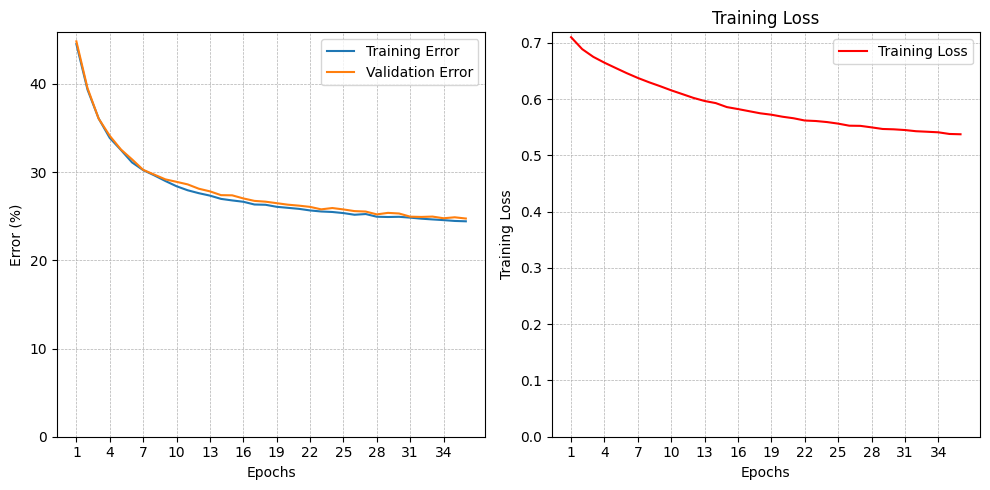



 - binary_feature_extraction_1hidden_lr1e-04_batch1024
Epoch 1; Train err = 46.33%; Val err = 46.03%; Loss: 0.7272
Epoch 2; Train err = 42.95%; Val err = 42.48%; Loss: 0.7030
Epoch 3; Train err = 40.25%; Val err = 39.54%; Loss: 0.6909
Epoch 4; Train err = 38.02%; Val err = 37.39%; Loss: 0.6826
Epoch 5; Train err = 36.39%; Val err = 36.20%; Loss: 0.6753
Epoch 10; Train err = 31.71%; Val err = 31.82%; Loss: 0.6506
Epoch 15; Train err = 29.36%; Val err = 29.57%; Loss: 0.6294
Epoch 20; Train err = 27.94%; Val err = 28.45%; Loss: 0.6111
Epoch 25; Train err = 27.10%; Val err = 27.16%; Loss: 0.5972
Epoch 30; Train err = 26.33%; Val err = 26.46%; Loss: 0.5846
Epoch 35; Train err = 25.91%; Val err = 26.10%; Loss: 0.5757
Epoch 40; Train err = 25.54%; Val err = 25.54%; Loss: 0.5652
Epoch 45; Train err = 25.19%; Val err = 25.09%; Loss: 0.5600
Epoch 50; Train err = 24.97%; Val err = 24.89%; Loss: 0.5523
Epoch 50; Train err = 24.97%; Val err = 24.89%; Loss: 0.5523
Stopping training...


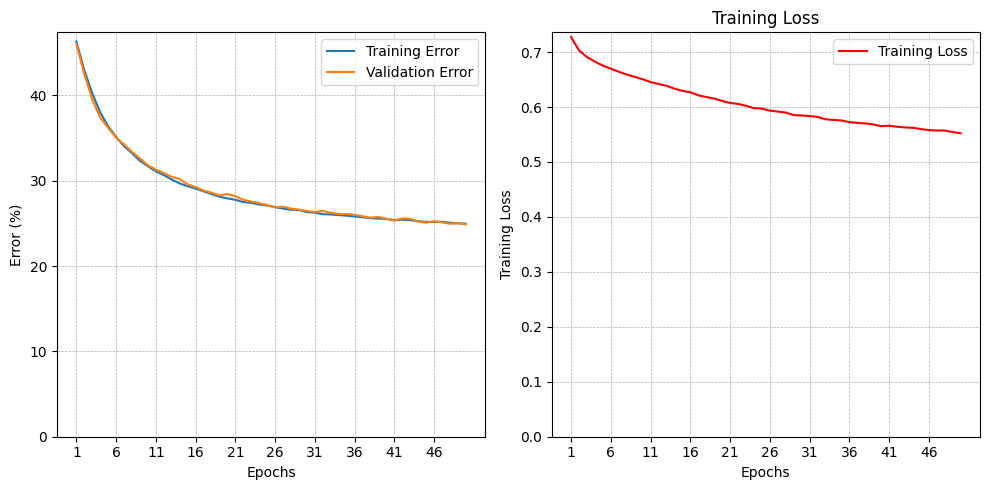



 - binary_feature_extraction_1hidden_lr1e-05_batch32
Epoch 1; Train err = 41.85%; Val err = 41.57%; Loss: 0.7059
Epoch 2; Train err = 36.30%; Val err = 36.20%; Loss: 0.6793
Epoch 3; Train err = 32.70%; Val err = 32.72%; Loss: 0.6628
Epoch 4; Train err = 30.56%; Val err = 30.68%; Loss: 0.6475
Epoch 5; Train err = 29.47%; Val err = 29.22%; Loss: 0.6330
Epoch 10; Train err = 26.77%; Val err = 26.53%; Loss: 0.5866
Epoch 15; Train err = 25.77%; Val err = 25.60%; Loss: 0.5630
Epoch 20; Train err = 24.55%; Val err = 24.71%; Loss: 0.5506
Epoch 24; Train err = 24.64%; Val err = 24.46%; Loss: 0.5445
Stopping training...


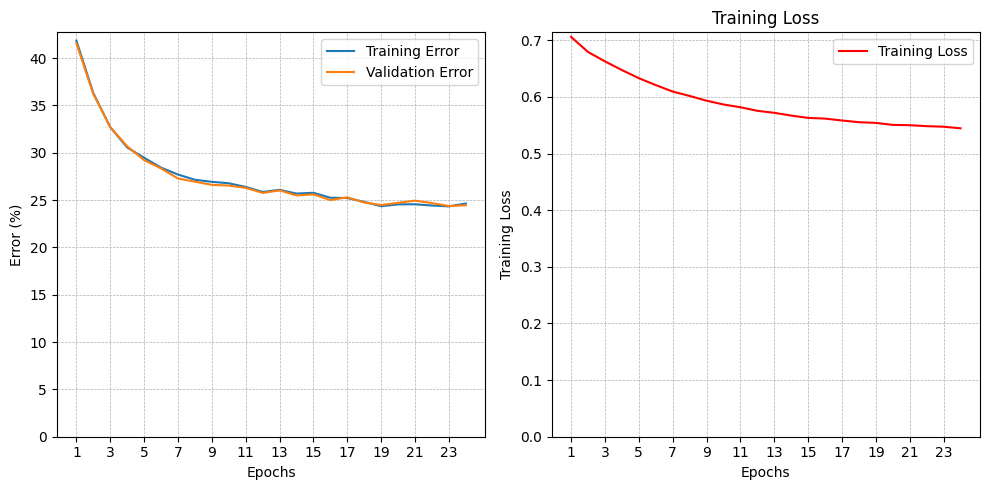



 - binary_feature_extraction_1hidden_lr1e-05_batch512
Epoch 1; Train err = 50.68%; Val err = 50.79%; Loss: 0.7511
Epoch 2; Train err = 50.62%; Val err = 50.84%; Loss: 0.7332
Epoch 3; Train err = 50.10%; Val err = 50.72%; Loss: 0.7245
Epoch 4; Train err = 49.36%; Val err = 49.67%; Loss: 0.7187
Epoch 5; Train err = 48.44%; Val err = 48.79%; Loss: 0.7151
Epoch 10; Train err = 44.92%; Val err = 44.81%; Loss: 0.7000
Epoch 15; Train err = 42.10%; Val err = 42.19%; Loss: 0.6912
Epoch 20; Train err = 39.84%; Val err = 39.72%; Loss: 0.6829
Epoch 25; Train err = 37.85%; Val err = 37.82%; Loss: 0.6761
Epoch 30; Train err = 36.28%; Val err = 36.11%; Loss: 0.6704
Epoch 35; Train err = 35.12%; Val err = 34.72%; Loss: 0.6640
Epoch 40; Train err = 33.88%; Val err = 33.46%; Loss: 0.6588
Epoch 45; Train err = 33.06%; Val err = 32.44%; Loss: 0.6546
Epoch 50; Train err = 32.36%; Val err = 31.97%; Loss: 0.6495


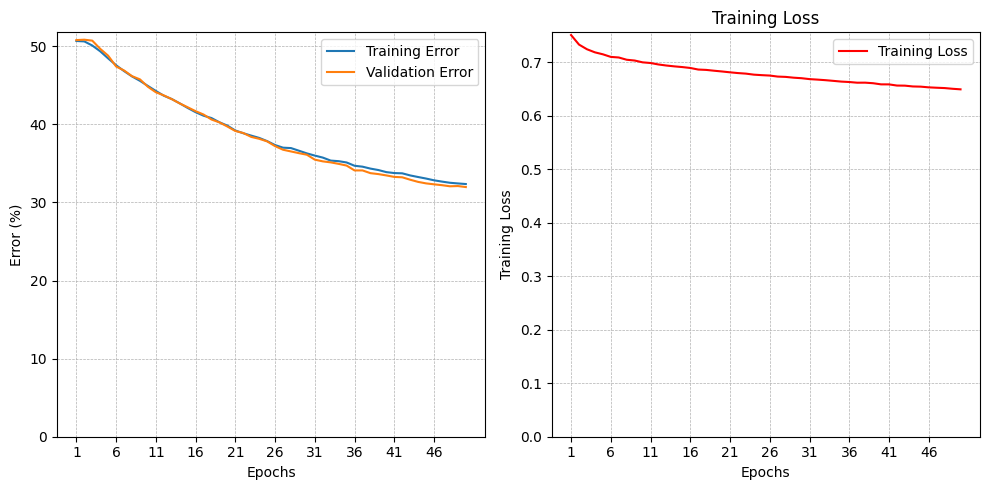



 - binary_feature_extraction_1hidden_lr1e-05_batch1024
Epoch 1; Train err = 49.47%; Val err = 49.41%; Loss: 0.7538
Epoch 2; Train err = 48.67%; Val err = 48.81%; Loss: 0.7417
Epoch 3; Train err = 47.93%; Val err = 48.12%; Loss: 0.7337
Epoch 4; Train err = 47.30%; Val err = 46.72%; Loss: 0.7292
Epoch 5; Train err = 46.80%; Val err = 46.23%; Loss: 0.7265
Epoch 10; Train err = 44.50%; Val err = 43.53%; Loss: 0.7124
Epoch 15; Train err = 42.71%; Val err = 41.55%; Loss: 0.7038
Epoch 20; Train err = 41.31%; Val err = 40.26%; Loss: 0.6959
Epoch 25; Train err = 40.04%; Val err = 39.24%; Loss: 0.6899
Epoch 30; Train err = 38.85%; Val err = 38.43%; Loss: 0.6848
Epoch 35; Train err = 38.02%; Val err = 37.61%; Loss: 0.6797
Epoch 40; Train err = 37.12%; Val err = 36.74%; Loss: 0.6758
Epoch 45; Train err = 36.24%; Val err = 35.95%; Loss: 0.6710
Epoch 50; Train err = 35.52%; Val err = 35.27%; Loss: 0.6689


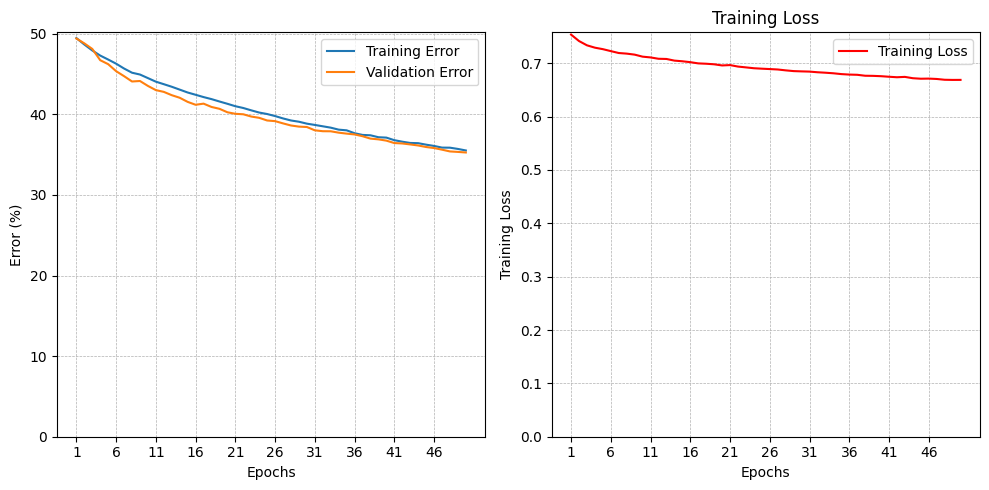

In [4]:
model_init_function = models.binary_feature_extraction_1hidden
epochs = 50
learning_rates = [0.001, 0.0001, 0.00001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

# Fine tuning



 - binary_finetuning_lr1e-04_batch32
Epoch 1; Train err = 7.08%; Val err = 7.97%; Loss: 0.3168
Epoch 2; Train err = 4.97%; Val err = 6.17%; Loss: 0.2011
Epoch 3; Train err = 4.01%; Val err = 5.52%; Loss: 0.1669
Epoch 4; Train err = 3.35%; Val err = 4.94%; Loss: 0.1470
Epoch 5; Train err = 2.90%; Val err = 4.86%; Loss: 0.1309
Epoch 10; Train err = 1.32%; Val err = 4.05%; Loss: 0.0847
Epoch 15; Train err = 0.48%; Val err = 3.71%; Loss: 0.0551
Epoch 20; Train err = 0.17%; Val err = 3.71%; Loss: 0.0383
Epoch 25; Train err = 0.09%; Val err = 3.75%; Loss: 0.0272
Epoch 26; Train err = 0.04%; Val err = 3.69%; Loss: 0.0264
Stopping training...


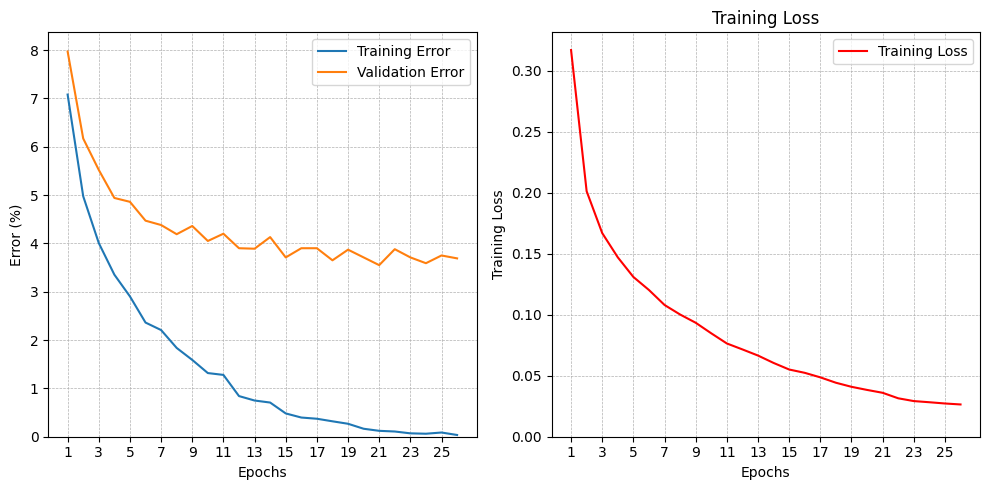



 - binary_finetuning_lr1e-04_batch512
Epoch 1; Train err = 20.92%; Val err = 20.97%; Loss: 0.5664
Epoch 2; Train err = 16.48%; Val err = 16.68%; Loss: 0.4160
Epoch 3; Train err = 13.94%; Val err = 14.27%; Loss: 0.3528
Epoch 4; Train err = 12.19%; Val err = 12.76%; Loss: 0.3110
Epoch 5; Train err = 10.84%; Val err = 11.76%; Loss: 0.2792
Epoch 10; Train err = 7.37%; Val err = 9.03%; Loss: 0.1973
Epoch 15; Train err = 5.66%; Val err = 7.85%; Loss: 0.1580
Epoch 20; Train err = 4.56%; Val err = 7.28%; Loss: 0.1324
Epoch 25; Train err = 3.75%; Val err = 6.89%; Loss: 0.1125
Epoch 30; Train err = 3.06%; Val err = 6.49%; Loss: 0.0972
Epoch 35; Train err = 2.44%; Val err = 6.37%; Loss: 0.0840
Epoch 40; Train err = 1.94%; Val err = 6.16%; Loss: 0.0723
Epoch 45; Train err = 1.46%; Val err = 6.15%; Loss: 0.0615
Epoch 46; Train err = 1.39%; Val err = 6.10%; Loss: 0.0600
Stopping training...


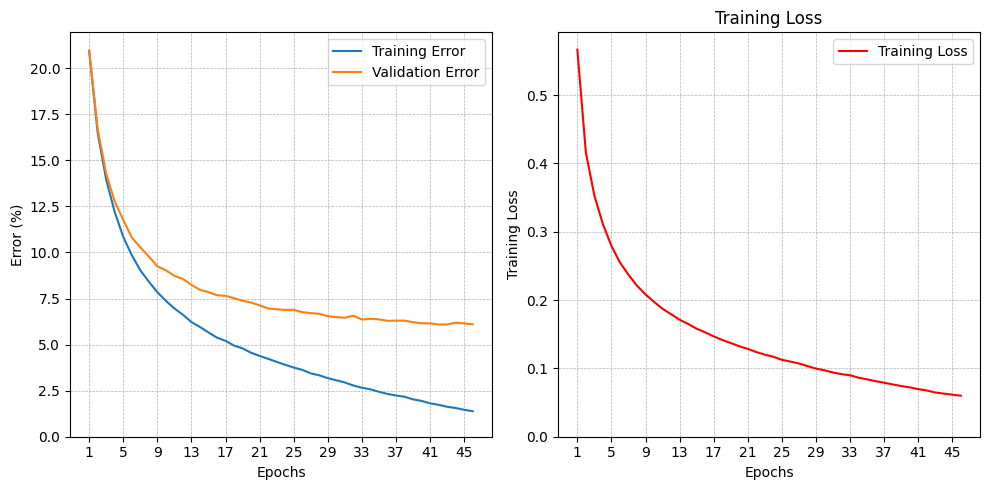



 - binary_finetuning_lr1e-04_batch1024
Epoch 1; Train err = 25.97%; Val err = 26.08%; Loss: 0.6311
Epoch 2; Train err = 21.27%; Val err = 21.69%; Loss: 0.4939
Epoch 3; Train err = 18.43%; Val err = 18.85%; Loss: 0.4349
Epoch 4; Train err = 16.52%; Val err = 17.18%; Loss: 0.3944
Epoch 5; Train err = 15.05%; Val err = 15.84%; Loss: 0.3631
Epoch 10; Train err = 10.95%; Val err = 12.01%; Loss: 0.2707
Epoch 15; Train err = 8.83%; Val err = 10.05%; Loss: 0.2224
Epoch 20; Train err = 7.38%; Val err = 8.87%; Loss: 0.1913
Epoch 25; Train err = 6.42%; Val err = 8.21%; Loss: 0.1687
Epoch 30; Train err = 5.63%; Val err = 7.77%; Loss: 0.1517
Epoch 35; Train err = 5.01%; Val err = 7.39%; Loss: 0.1378
Epoch 40; Train err = 4.50%; Val err = 7.08%; Loss: 0.1248
Epoch 45; Train err = 4.00%; Val err = 6.92%; Loss: 0.1148
Epoch 50; Train err = 3.63%; Val err = 6.75%; Loss: 0.1052


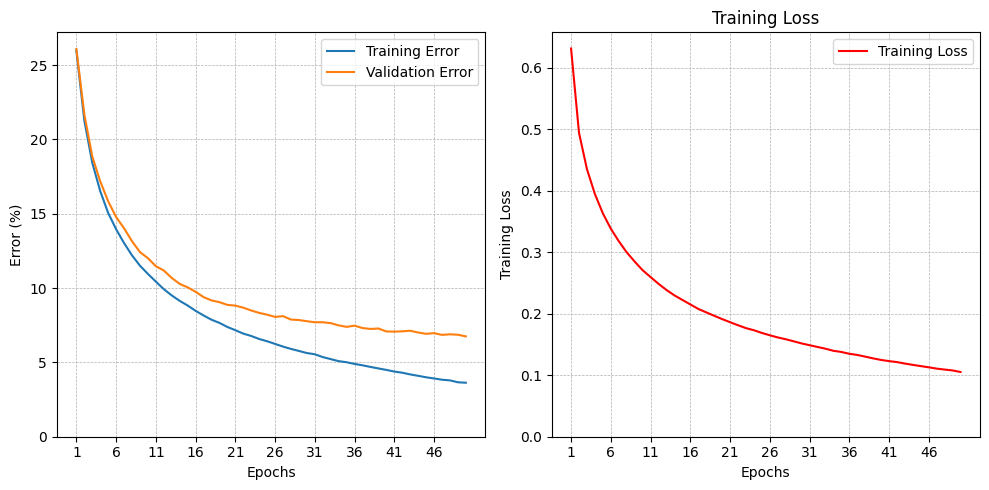



 - binary_finetuning_lr1e-05_batch32
Epoch 1; Train err = 18.98%; Val err = 19.46%; Loss: 0.5221
Epoch 2; Train err = 14.41%; Val err = 14.81%; Loss: 0.3928
Epoch 3; Train err = 12.18%; Val err = 13.12%; Loss: 0.3387
Epoch 4; Train err = 10.71%; Val err = 11.46%; Loss: 0.3040
Epoch 5; Train err = 9.48%; Val err = 10.22%; Loss: 0.2801
Epoch 10; Train err = 6.83%; Val err = 7.59%; Loss: 0.2198
Epoch 15; Train err = 5.54%; Val err = 6.55%; Loss: 0.1910
Epoch 20; Train err = 4.81%; Val err = 6.28%; Loss: 0.1708
Epoch 25; Train err = 4.22%; Val err = 5.79%; Loss: 0.1595
Epoch 30; Train err = 3.74%; Val err = 5.47%; Loss: 0.1477
Epoch 35; Train err = 3.33%; Val err = 5.07%; Loss: 0.1369
Epoch 40; Train err = 3.02%; Val err = 4.98%; Loss: 0.1311
Epoch 45; Train err = 2.72%; Val err = 5.03%; Loss: 0.1209
Epoch 46; Train err = 2.74%; Val err = 4.99%; Loss: 0.1219
Stopping training...


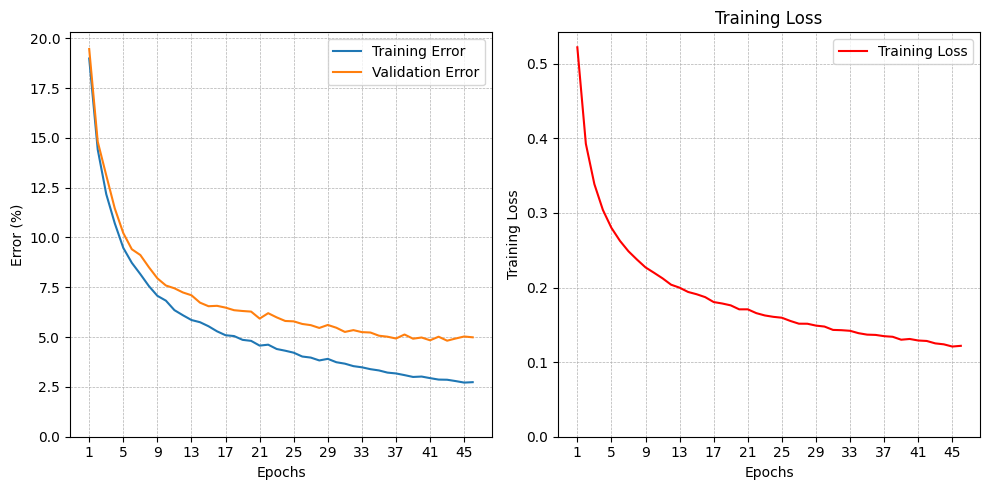



 - binary_finetuning_lr1e-05_batch512
Epoch 1; Train err = 38.51%; Val err = 39.10%; Loss: 0.7305
Epoch 2; Train err = 32.83%; Val err = 33.11%; Loss: 0.6418
Epoch 3; Train err = 29.51%; Val err = 29.82%; Loss: 0.5960
Epoch 4; Train err = 27.36%; Val err = 27.77%; Loss: 0.5639
Epoch 5; Train err = 25.59%; Val err = 25.41%; Loss: 0.5378
Epoch 10; Train err = 20.97%; Val err = 21.30%; Loss: 0.4608
Epoch 15; Train err = 18.28%; Val err = 18.61%; Loss: 0.4132
Epoch 20; Train err = 16.42%; Val err = 16.90%; Loss: 0.3786
Epoch 25; Train err = 14.98%; Val err = 15.61%; Loss: 0.3509
Epoch 30; Train err = 13.80%; Val err = 14.59%; Loss: 0.3281
Epoch 35; Train err = 12.88%; Val err = 13.72%; Loss: 0.3094
Epoch 40; Train err = 12.10%; Val err = 13.18%; Loss: 0.2930
Epoch 45; Train err = 11.48%; Val err = 12.56%; Loss: 0.2788
Epoch 50; Train err = 10.90%; Val err = 11.98%; Loss: 0.2661


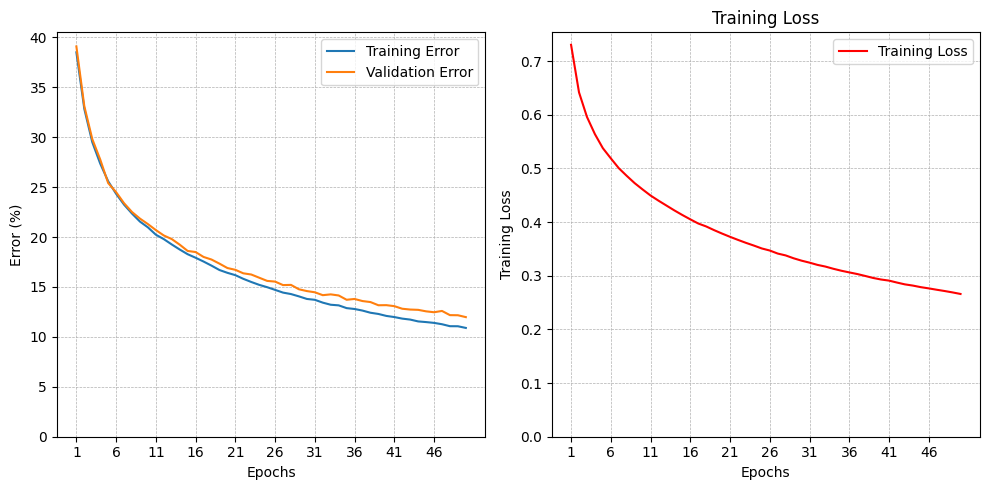



 - binary_finetuning_lr1e-05_batch1024
Epoch 1; Train err = 45.06%; Val err = 44.95%; Loss: 0.7853
Epoch 2; Train err = 40.15%; Val err = 39.70%; Loss: 0.7170
Epoch 3; Train err = 36.38%; Val err = 36.03%; Loss: 0.6721
Epoch 4; Train err = 33.68%; Val err = 33.46%; Loss: 0.6389
Epoch 5; Train err = 31.64%; Val err = 31.41%; Loss: 0.6144
Epoch 10; Train err = 25.84%; Val err = 25.94%; Loss: 0.5378
Epoch 15; Train err = 22.95%; Val err = 23.21%; Loss: 0.4926
Epoch 20; Train err = 20.98%; Val err = 21.17%; Loss: 0.4592
Epoch 25; Train err = 19.48%; Val err = 19.63%; Loss: 0.4332
Epoch 30; Train err = 18.22%; Val err = 18.35%; Loss: 0.4110
Epoch 35; Train err = 17.25%; Val err = 17.45%; Loss: 0.3922
Epoch 40; Train err = 16.34%; Val err = 16.86%; Loss: 0.3754
Epoch 45; Train err = 15.60%; Val err = 16.22%; Loss: 0.3606
Epoch 50; Train err = 14.90%; Val err = 15.57%; Loss: 0.3479


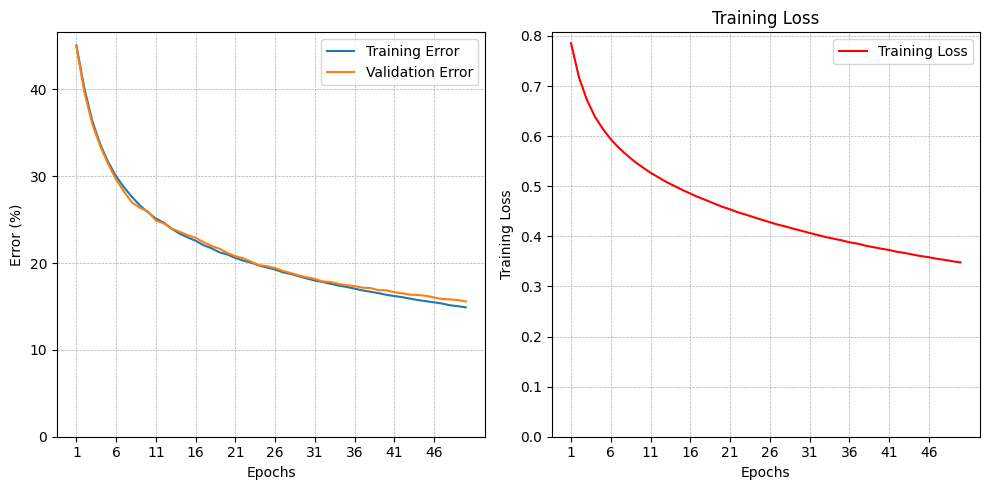

In [6]:
model_init_function = models.binary_finetuning
epochs = 50
learning_rates = [0.0001, 0.00001]
batch_sizes = [32, 512, 1024]

min_epochs = 5
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

## Finetuning with dropout fc layer



 - binary_finetuning_1hidden_lr1e-04_batch32
Epoch 1; Train err = 8.22%; Val err = 8.67%; Loss: 0.3866
Epoch 2; Train err = 5.82%; Val err = 6.97%; Loss: 0.2254
Epoch 3; Train err = 4.47%; Val err = 5.74%; Loss: 0.1854
Epoch 4; Train err = 3.90%; Val err = 5.12%; Loss: 0.1617
Epoch 5; Train err = 3.34%; Val err = 4.81%; Loss: 0.1465
Epoch 10; Train err = 1.66%; Val err = 4.02%; Loss: 0.0946
Epoch 15; Train err = 0.83%; Val err = 4.06%; Loss: 0.0637
Epoch 19; Train err = 0.39%; Val err = 3.83%; Loss: 0.0476
Stopping training...


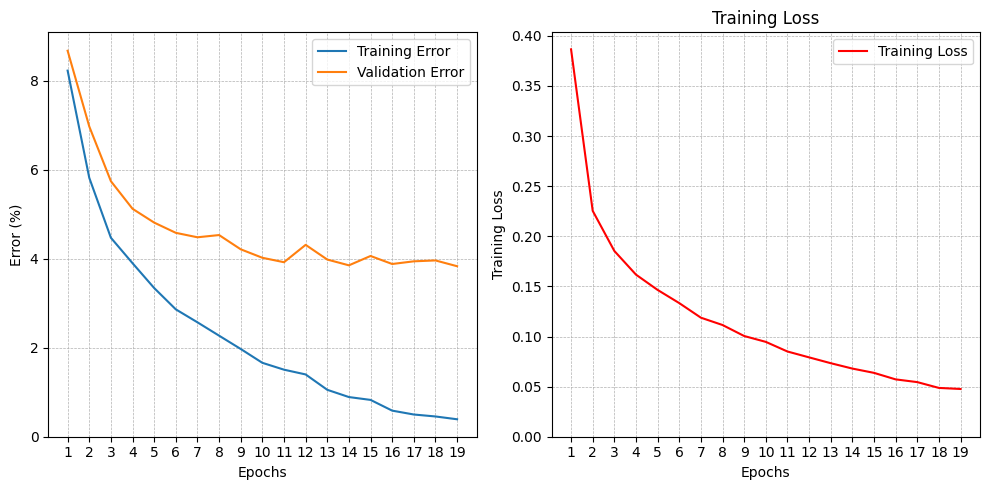



 - binary_finetuning_1hidden_lr1e-04_batch512
Epoch 1; Train err = 28.15%; Val err = 28.07%; Loss: 0.6702
Epoch 2; Train err = 22.73%; Val err = 22.71%; Loss: 0.5804
Epoch 3; Train err = 19.03%; Val err = 19.18%; Loss: 0.5058
Epoch 4; Train err = 16.45%; Val err = 16.89%; Loss: 0.4400
Epoch 5; Train err = 14.44%; Val err = 15.28%; Loss: 0.3916
Epoch 10; Train err = 9.40%; Val err = 10.28%; Loss: 0.2634
Epoch 15; Train err = 7.15%; Val err = 8.46%; Loss: 0.2060
Epoch 20; Train err = 5.82%; Val err = 7.50%; Loss: 0.1739
Epoch 25; Train err = 4.92%; Val err = 6.81%; Loss: 0.1496
Epoch 30; Train err = 4.22%; Val err = 6.58%; Loss: 0.1333
Epoch 35; Train err = 3.59%; Val err = 6.24%; Loss: 0.1182
Epoch 40; Train err = 3.00%; Val err = 5.93%; Loss: 0.1045
Epoch 45; Train err = 2.52%; Val err = 5.91%; Loss: 0.0938
Epoch 48; Train err = 2.27%; Val err = 5.83%; Loss: 0.0866
Stopping training...


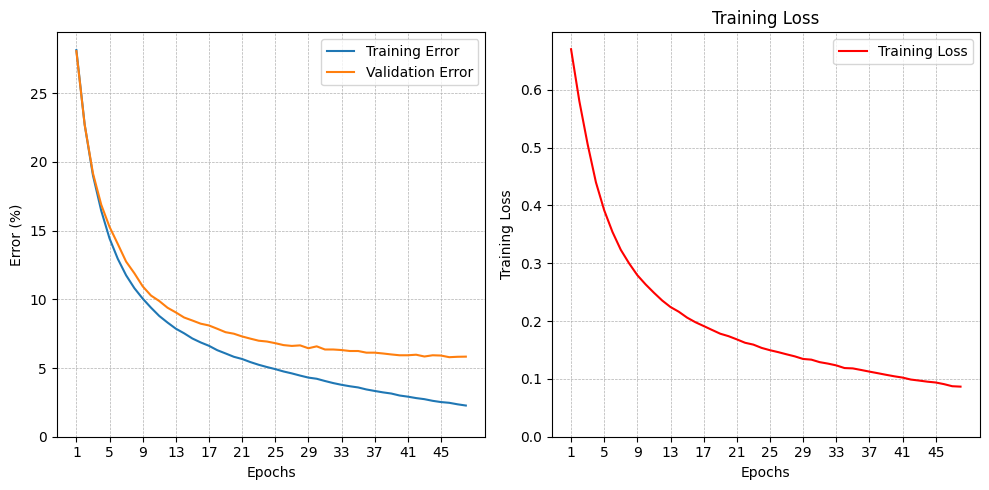

In [7]:
model_init_function = models.binary_finetuning_1hidden
epochs = 50
lr = 0.0001
batch_sizes = [32, 512]

min_epochs = 5
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for batch_size in batch_sizes:
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

    # Initialize the model
    model = model_init_function()
    model = model.to(device)
    model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
    print("\n\n - " + model_name)
    writer = SummaryWriter('logs/'+model_name)

    # Train the model
    train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
    cnn_functions.plot_training_stats(train_err, val_err, train_loss)
    model_name += f"_epochs{len(train_err)}"
    writer.close()
    
    # Save the progress
    torch.save(model.state_dict(), './weights/' + model_name + '.pth')
    stats_dict = {
        'train_err': train_err,
        'val_err': val_err,
        'train_loss': train_loss
    }
    with open('./stats/' + model_name + '.pkl', 'wb') as f:
        pickle.dump(stats_dict, f)

# Confusion Matrix

In [1]:
model_init_function = models.binary_finetuning
weights_filename = 'binary_finetuning_lr1e-04_batch32_epochs26.pth'

# Load the model and the test data
model = model_init_function()
model.load_state_dict(torch.load(os.path.join(script_dir, './weights', weights_filename)))
test_batch_size = 1000
test_loader = DataLoader(test_ds, batch_size=test_batch_size, shuffle=True)

NameError: name 'models' is not defined

Test accuracy: 96.49%


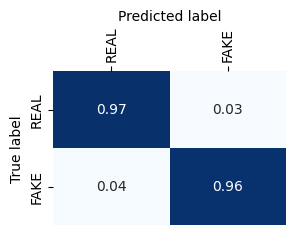

In [8]:
class_names = [labels_map[c] for c in labels_map]
cm_figsize = (3, 2)

# Plot the confusion matrix
confusion_matrix, test_accuracy = cnn_functions.make_confusion_matrix(device, model, test_loader, len(class_names))
print(f'Test accuracy: {test_accuracy*100:.2f}%')
cnn_functions.plot_confusion_matrix(confusion_matrix, class_names, cm_figsize)

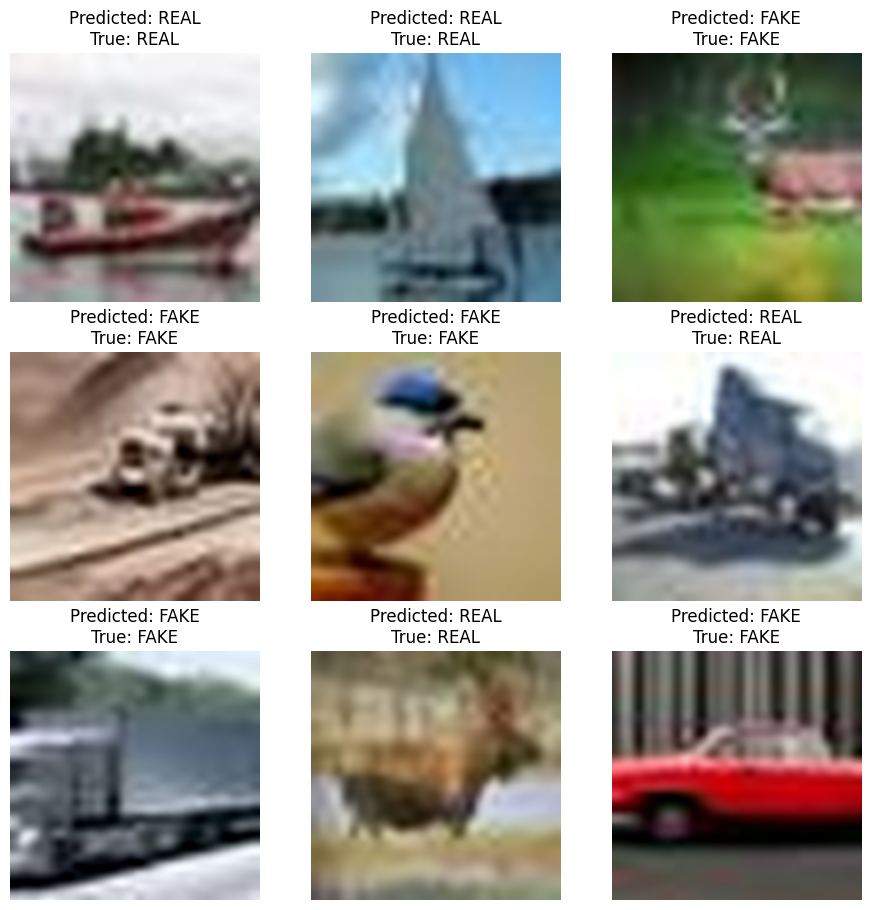

In [9]:
# Visualise some random examples of predictions 
cnn_functions.visualise_samples(model, test_ds, labels_map)